# The Dijkstra's Algorithm on a Graph

### Question 1

The following code cell defines a Python class called Minervan that you will use in an in-class activity. It needs to have the following attributes:

- Minervans Names
- Ways to store connections with other friends.


For example, Ha is an M'23 who is friends with Esther, Trang, and Ha. How would you represent this information as a network or graph? Examine the code below and write the $add$_$friends$ method. Provide evidence that your code is correct.



Note: friendship is a bilateral relationship. If you are friends with Einstein, Einstein is friends with you! Don't forget that the methods inside the Python class should be aware of this notion. 


In [52]:
class Minervan:
    """
    A Minervan class

    Attributes
    ----------
    name : str
        The name of the Minervan
    friends: set()
        If available, the set of friends this Minervan has
    """
    def __init__(self, name, friends=None):
        self.name = name
        self.friends_set = set()
        if friends is not None:
            for friend in friends:
                self.friends_set.add(friend)
                friend.friends_set.add(self)
        
        
    def __repr__(self):
        return f'{self.name}'


    def add_friends(self, friends):
        """
        Add either a single Minervan node
        or multiple friends to the friend's list
        and add the person to the friends' list
        Parameters
        ----------
        friends: Minervan node/ arr
            A singular Minervan node/ an array of Minervan nodes 
            to be added to the friends list
        Returns
        -------
        None
        """
        if type(friends) == list:
            for friend in friends:
                self.friends_set.add(friend)
                friend.friends_set.add(self)
        else:
            self.friends_set.add(friends)
            friends.friends_set.add(self)
        return None

a = Minervan('Trang')
b = Minervan('Esther')

ha = Minervan('Ha', friends = [b, a])

print(a.friends_set, b.friends_set, ha.friends_set)

a.add_friends(a)

print(a.friends_set, b.friends_set)

New = [Minervan('Sona'), Minervan('Nikita'), Minervan('Hovik'), Minervan('Aniket'), Minervan('Alan')]

ha.add_friends(New)

print(ha.friends_set)

{Ha} {Ha} {Esther, Trang}
{Ha, Trang} {Ha}
{Esther, Trang, Alan, Hovik, Nikita, Aniket, Sona}


### Question 2
Consider the undirected graph below. The source vertex is the node with the value 1. The edges between the nodes are weighted by the numbers annotated in blue.



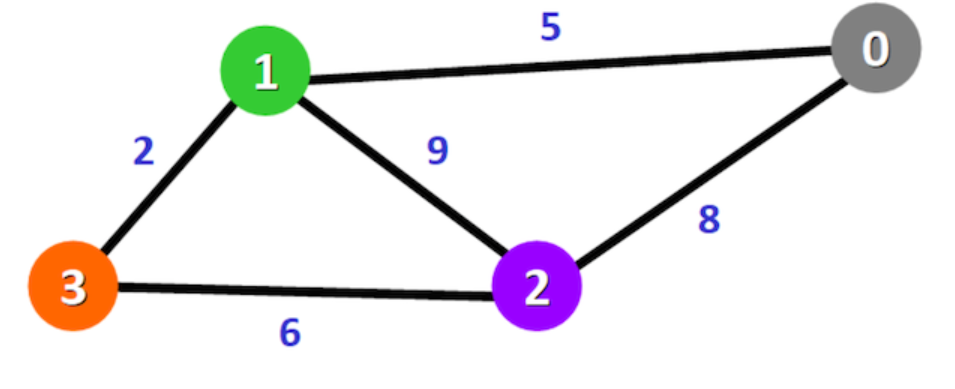

In [43]:
from IPython.display import Image
Image(filename="Dijkstra.10.PNG")

At the end of this workbook, you will implement the Dijkstra's Algorithm on this graph. 



First, let's create this graph! At the end of the following code cell, you will need to add:

- nodes to the empty graph
- edges to connect the vertices
- weighted edges between the vertices. Notice that the edge weights for this specific graph are the same regardless of the direction. However, in general, this need not be the case. Ie., edge connecting 1 to 2 can have a weight of 9, whereas the edge starting at 2 and ending in 1 can have a different weight value. Notice how the implementation below takes that into account. 

In [50]:
class Node:
    ''' 
    Defining the Node class

    Attributes:
    name - name of the node
    color - color of the node
    pi - predecessor
    dist - distance
    adj_list - adjacency list
    weighted - weights of the adjacency list
    '''

    BLACK = 'B'
    GRAY = 'G'
    WHITE = 'W'

    def __init__(self, name, adj_list=None, weighted_adj_list=None):
        self.name = name
        self.color = Node.WHITE
        self.pi = None
        self.dist = float('inf')
        self.adj_list = adj_list
        self.weighted_adj_list = weighted_adj_list
        if not adj_list:
            self.adj_list = []
        if not weighted_adj_list:
            self.weighted_adj_list = {}

    def add_edge(self, node, weight=0):
        if node.name not in self.adj_list:
            self.adj_list.append(node.name)

    def remove_edge(self, node):
        self.adj_list.remove(node.name)

    def add_weighted_edge(self,node,weight=0):
        self.weighted_adj_list[node.name] = weight

    def remove_weighted_edge(self,node):
        self.weighted_adj_list.pop(node.name, None)

    def to_string(self):
        res = self.name + ': [' + ' '.join(self.adj_list) + '] color: ' + self.color + ' dist: ' + str(self.dist)
        if not self.pi:
            res += ' pi: Nil'
        else:
            res += ' pi: ' + self.pi
        return res
    
    def to_string_w(self):
        res = self.name + ': [' + ''.join(self.edge_string()) + '] dist: ' + str(self.dist)
        if not self.pi:
            res += ' pi: Nil'
        else:
            res += ' pi: ' + self.pi
        return res

    def edge_string(self):
        res = ''
        for k,v in self.weighted_adj_list.items():
            res += '(' + k + ',' + str(v)+')'
        return res

class Graph:
    ''' 
    Defining the Graph class
    
    Attributes:
    nodes - nodes from Node class
    '''

    def __init__(self, nodes={}):
        self.nodes = nodes

    def add_node(self,node):
        # initialising dictionaries
        self.nodes[node.name] = node

    def add_edge(self,n1,n2):
        self.nodes[n1].add_edge(self.nodes[n2])

    def remove_edge(self, n1, n2):
        self.nodes[n1].remove_edge(self.nodes[n2])

    def add_weighted_edge(self,n1,n2, weight):
        self.nodes[n1].add_weighted_edge(self.nodes[n2], weight)

    def remove_weighted_edge(self, n1, n2):
        self.nodes[n1].remove_weighted_edge(self.nodes[n2])

    def to_string(self):
        res = ""
        for n in self.nodes.keys():
            res += self.nodes[n].to_string() + ", "
        return res 
    
g = Graph()
a = Node('0')
b = Node('1')
c = Node('2')
d = Node('3')

nodes = [a,b,c,d]
for node in nodes:
    g.add_node(node)

g.add_weighted_edge(a.name, b.name, 5)
g.add_weighted_edge(b.name, a.name, 5)
g.add_weighted_edge(a.name, c.name, 8)
g.add_weighted_edge(c.name, a.name, 8)
g.add_weighted_edge(b.name, c.name, 9)
g.add_weighted_edge(c.name, b.name, 9)
g.add_weighted_edge(b.name, d.name, 2)
g.add_weighted_edge(d.name, b.name, 2)
g.add_weighted_edge(c.name, d.name, 6)
g.add_weighted_edge(d.name, c.name, 6)

g.add_edge(a.name, b.name)
g.add_edge(b.name, a.name)
g.add_edge(a.name, c.name)
g.add_edge(c.name, a.name)
g.add_edge(b.name, c.name)
g.add_edge(c.name, b.name)
g.add_edge(b.name, d.name)
g.add_edge(d.name, b.name)
g.add_edge(c.name, d.name)
g.add_edge(d.name, c.name)

assert g.to_string() == '0: [1 2] color: W dist: inf pi: Nil, 1: [0 2 3] color: W dist: inf pi: Nil, 2: [0 1 3] color: W dist: inf pi: Nil, 3: [1 2] color: W dist: inf pi: Nil, '

### Question 3
Write out the steps of the Dijkstra's algorithm for this example and find out the shortest distance for every node. Note that this is not a coding question! You will want to explain, in detail, how the algorithm works and use it to compute the shortest distance from the source node to every node in the graph.



Explain, in no less than 40 words, how your answer to this question is a good application of #AlgorithmicStrategies (please include a word count as part of your assessment). For an appropriate justification, you need to reflect on how the steps of this algorithm allow you to correctly and efficiently find the shortest path between two nodes.

- Dijkstra's algorithm firstly sets the distance from the initial node to the goal node to be infinity. 
- Then it itterates and finds the smallest path from the source node to another node. 
- Then it gives us the smallest path with non negative edge or node value. 

We do not have a negative weight, therefore Dijkstra's algorithm is a suitable tool here, as it does not need to calculate the total distrances of each paths and compare. This does not guarantee an optimal result overall, but is a quick method to to achieve some optimality. 

### Question 4
Fill in the code below for the relax and extract_min functions. Please review the pseudocode from Cormen et al for the relaxfunction, and consider the guiding hints from the docstrings in the skeleton codes below for both functions.

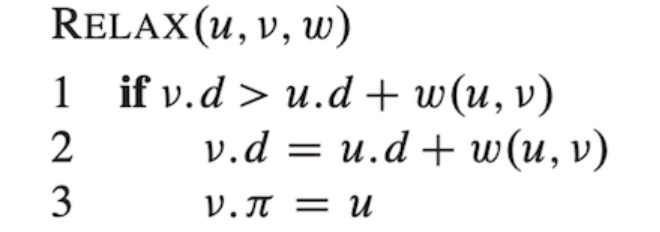

In [4]:
from IPython.display import Image
Image(filename="Dijkstra.20.PNG")

You will use these functions when you implement the Dijkstra's algorithm in the next question. 



In [45]:
def extract_min(nodes_list):
    '''
    Extract the node with min distance in a list with nodes
    Parameters
    ----------
    nodes_list
        A list with nodes inside
    Returns
    -------
    Node 
        A node with min distance in the nodes list 
    '''
    a = min(nodes_list, key = lambda a:a.dist)
    nodes_list.remove(a)
    return a


def relax(u,v):
    '''
    Perform edge relaxation by updating Node class's attribute
    Parameters
    ----------
    u
        A node 
    v 
        An adjacent node from u's outgoing edge
    Returns
    -------
    None 
    '''
    if v.dist > u.dist + u.weighted_adj_list[v.name]:
        v.dist = u.dist + u.weighted_adj_list[v.name]
        v.pi = u
        
    return None 

### Question 5
Finally, complete the Dijkstra's Algorithm function using the pseudocode from Cormen et al. transcribed below to guide you:

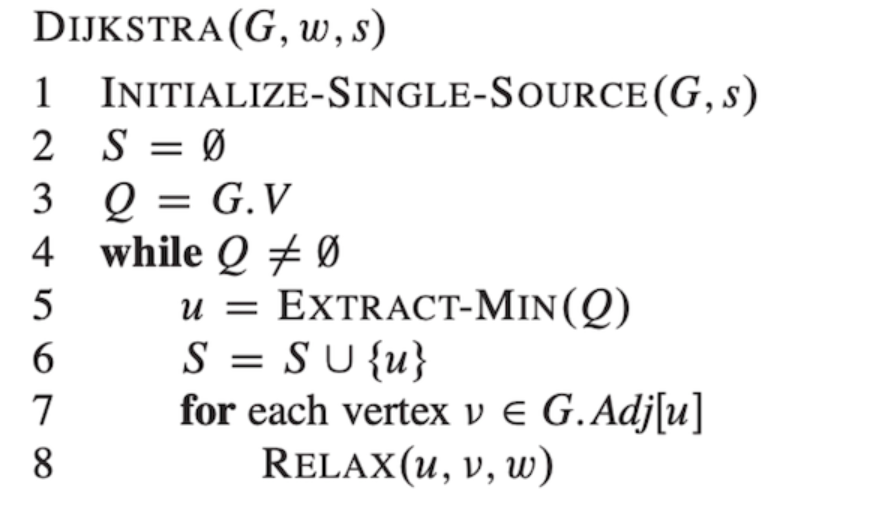

In [5]:
from IPython.display import Image
Image(filename="Dijkstra.30.PNG")

Note that there are several lines of explicit code missing, so you will find it helpful to work through the step-by-step directions provided in the study guide. Specifically:

a. You will need to use both the extract_min and the relax functions you have coded above.

b. Though it's not necessary to change the nodes' colors (white, gre/ay, and black) to run this algorithm, doing so (as Cormen et al. do) will be helpful to identify and distinguish the state of the nodes at each stage in the algorithm.



In [54]:
def dijkstra(G, s):
    """
    Apply the Dijkstra Algorithm to find the shortest path of a graph.  
    Parameters
    ----------
    G: 
        A graph
    s:
        A source node 
    Returns
    -------
    None 
    """
    visited = set()
    s.color = Node.GRAY
    s.dist = 0 
    unvisited_queue = [G.nodes[v] for v in G.nodes.keys()]
    while unvisited_queue:
        # your block of code here: make sure to update the visited and unvisited queue objects
        u = extract_min(unvisited_queue)
        for vname, weight in u.weighted_adj_list.items(): 
                 relax(u, G.nodes[vname])
        # your block of code here: make sure to use the relax function, where appropriate
    return None

# Test your code on the graph above with the source node 1:
s = g.nodes["1"]

dijkstra(g, s)
shortest_path = []
for v in g.nodes.keys():
    shortest_path.append((g.nodes[v].name,g.nodes[v].dist))

assert shortest_path == [('0', 5), ('1', 0), ('2', 8), ('3', 2)]

In [49]:
from collections import defaultdict

class Graph:
    def __init__(self):
        self.nodes = set()
        self.edges = defaultdict(list)
        self.distances = {}
    
    def addNode(self,value):
        self.nodes.add(value)
    
    def addEdge(self, fromNode, toNode, distance):
        self.edges[fromNode].append(toNode)
        self.distances[(fromNode, toNode)] = distance


def dijkstra(graph, initial):
    visited = {initial : 0}
    path = defaultdict(list)

    nodes = set(graph.nodes)

    while nodes:
        minNode = None
        for node in nodes:
            if node in visited:
                if minNode is None:
                    minNode = node
                elif visited[node] < visited[minNode]:
                    minNode = node
        if minNode is None:
            break

        nodes.remove(minNode)
        currentWeight = visited[minNode]

        for edge in graph.edges[minNode]:
            weight = currentWeight + graph.distances[(minNode, edge)]
            if edge not in visited or weight < visited[edge]:
                visited[edge] = weight
                path[edge].append(minNode)
    
    return visited, path

customGraph = Graph()
customGraph.addNode("0")
customGraph.addNode("1")
customGraph.addNode("2")
customGraph.addNode("3")

customGraph.addEdge("0","1", 5)
customGraph.addEdge("1","2", 9)
customGraph.addEdge("1","3", 2)
customGraph.addEdge("2","3", 6)
customGraph.addEdge("2","0", 8)
    
print(dijkstra(customGraph, "0"))

({'0': 0, '1': 5, '2': 14, '3': 7}, defaultdict(<class 'list'>, {'1': ['0'], '2': ['1'], '3': ['1']}))


### Question 6
What will happen to Dijkstra's Algorithm if negative weights exist in our graph? For example, what is the output when we change the source node to '0' and the distance of 2 → 1 = -5? Use this example to explain your answer.

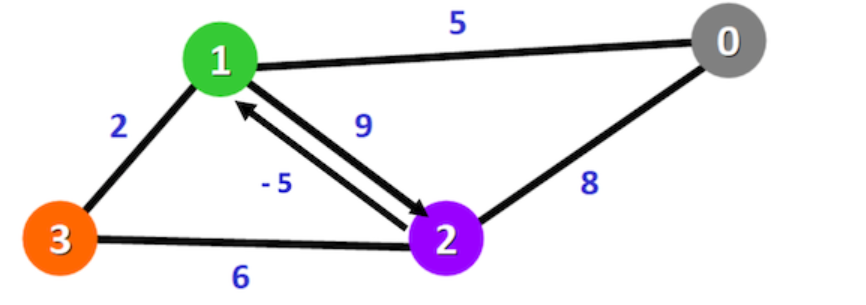

In [2]:
from IPython.display import Image
Image(filename="Dijkstra.40.PNG")

V = [0,1,2,3]

0 -> 1 = 5

0-> 2 = 5 + 9 = 14

0-> 3 = 7

0-> 3 = 20, this is smaller than 7, therefore we will not update it

0-> 2 = 14

0-> 2 = 13



Output = [0,5,13,7]

The output should have been [0,3,11,5] taken the negative path into account, but the negative distance is not faced, since the same node can not be visited again. This is why the solution we get is not always optimal.